# Question 2

First of all, we import the required modules.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics as sgr
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


from matplotlib.collections import LineCollection
from statsmodels.stats.outliers_influence import summary_table
from matplotlib import figure

%matplotlib inline

C:\Users\leo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


We import the csv file and set date as index.

In [2]:
wow_df = pd.read_csv('wowcointotal.csv') #read csv
index = pd.Index(sm.tsa.datetools.dates_from_range('2015Q1', '2017Q4'))#use time as index
wow_df.head(10) #select first 10 records

,Region,Date,Price,Time left on Auction
0,US,4/7/2015 17:12,30000,Short
1,US,4/7/2015 17:42,30000,Short
2,US,4/7/2015 18:13,30300,Short
3,US,4/7/2015 18:42,30300,Short
4,US,4/7/2015 19:04,30603,Short
5,US,4/7/2015 20:04,30909,Short
6,US,4/7/2015 21:04,31218,Short
7,US,4/7/2015 22:04,30906,Short
8,US,4/7/2015 23:04,31215,Short
9,US,4/8/2015 0:04,30903,Short


We import datetime module and transform Date into 'YYYY-MM-DD' format. Then we convert Dates to ordinal values in order to use time points as the independent variable for our predictions. We store it in a new column in our model names Date_ord.

In [3]:
import datetime as dt

wow_df.Date = pd.to_datetime(wow_df.Date, format='%m/%d/%Y %H:%M') #change date format
wow_df['Date_ord'] = wow_df.Date.map(dt.datetime.toordinal) #convert to ordinal

In order to apply Linear Regression analysis, we will use R-style formulas.

In [4]:
from sklearn.linear_model import LinearRegression

mod = smf.ols("Price ~ Date_ord", data=wow_df) #We create a model
wow_res = mod.fit() #and fit it
wow_res.params #`params` attribute gives us the intercept and the slope of the regression line.

Intercept   -8.904469e+07
Date_ord     1.210384e+02
dtype: float64

We will know see a summary of all regression results and parameters.

In [5]:
wow_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 3.226e+05
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        20:14:33   Log-Likelihood:            -1.2932e+06
No. Observations:              115274   AIC:                         2.586e+06
Df Residuals:                  115272   BIC:                         2.586e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.904e+07   1.57e+05   -567.620      0.000   -8.94e+07   -8.87e+07
Date_ord     121.0384      0.213    567.974      0.000     120.621     121.456
==============================================================================
Omnibus:                      427.664   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.924
Skew:                           0.147   Prob(JB):                     9.81e-95
Kurtosis:                       3.060   Cond. No.                     2.18e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

At this point, we will plot our fitted model and the corresponding data for price over time.

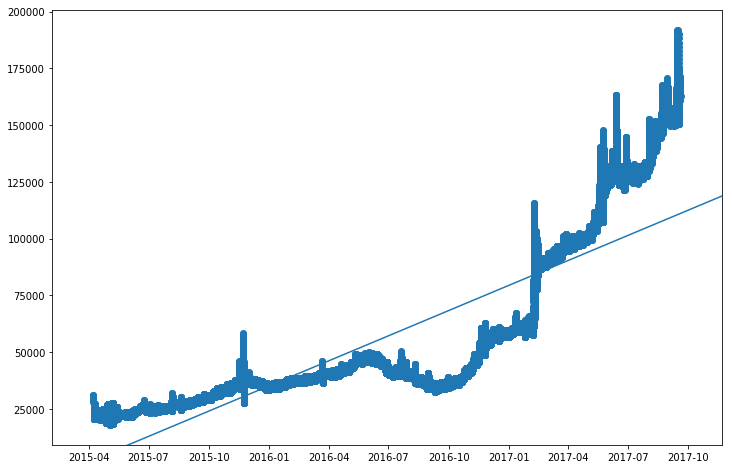

In [6]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

wow_price = wow_df.Price.values
wow_date = wow_df.Date.values
ax.scatter(wow_date,wow_price)
fig = sgr.regressionplots.abline_plot(model_results=wow_res, ax=ax)

It is also useful to plot the observed data along with the fitted data, that is, the data on the regression line that correspond to the xxvalues.

The fitted values of our model are:

In [7]:
wow_res.fittedvalues

0           2618.914351
1           2618.914351
2           2618.914351
3           2618.914351
4           2618.914351
5           2618.914351
6           2618.914351
7           2618.914351
8           2618.914351
9           2739.952703
10          2739.952703
11          2739.952703
12          2739.952703
13          2739.952703
14          2739.952703
15          2739.952703
16          2739.952703
17          2739.952703
18          2739.952703
19          2739.952703
20          2739.952703
21          2739.952703
22          2739.952703
23          2739.952703
24          2739.952703
25          2739.952703
26          2739.952703
27          2739.952703
28          2739.952703
29          2739.952703
              ...      
115244    111069.277900
115245    111069.277900
115246    111069.277900
115247    111069.277900
115248    111069.277900
115249    111069.277900
115250    111069.277900
115251    111069.277900
115252    111069.277900
115253    111069.277900
115254    111069

We can see that there is a tipping point between 2017-01 and 2017-04. To see which Date_ord values the tipping point corresponds to, we will plot again but with ordinal values as x-axis values.

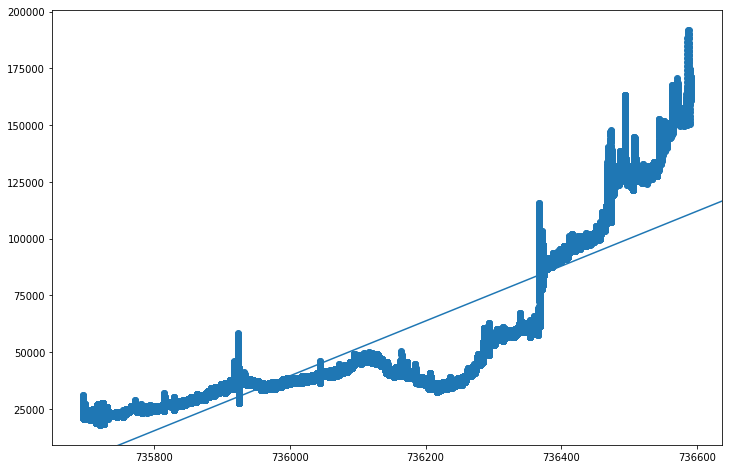

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

wow_price = wow_df.Price.values
wow_date = wow_df.Date_ord.values
ax.scatter(wow_date,wow_price)
fig = sgr.regressionplots.abline_plot(model_results=wow_res, ax=ax)

We will ordinal value 736380 as our tipping point.

We will split our dataframes into two dataframes according to the datetime compared to the tipping point.

In [9]:
wow_df_1 = wow_df[wow_df.Date_ord <=736380]
wow_df_2 = wow_df[wow_df.Date_ord >736380]

Now we will apply two linear regression models to each data frame respectively.

In [10]:
mod_1 = smf.ols("Price ~ Date_ord", data=wow_df_1) #We create a model
wow_res_1 = mod_1.fit() #and fit it
wow_res_1.params #`params` attribute gives us the intercept and the slope of the regression line.

Intercept   -3.922465e+07
Date_ord     5.334437e+01
dtype: float64

In [11]:
wow_res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                 1.962e+05
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        20:14:51   Log-Likelihood:            -9.2860e+05
No. Observations:               90371   AIC:                         1.857e+06
Df Residuals:                   90369   BIC:                         1.857e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.922e+07   8.86e+04   -442.537      0.000   -3.94e+07   -3.91e+07
Date_ord      53.3444      0.120    442.976      0.000      53.108      53.580
==============================================================================
Omnibus:                    36129.812   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           411968.111
Skew:                           1.605   Prob(JB):                         0.00
Kurtosis:                      12.955   Cond. No.                     2.79e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
mod_2 = smf.ols("Price ~ Date_ord", data=wow_df_2) #We create a model
wow_res_2 = mod_2.fit() #and fit it
wow_res_2.params #`params` attribute gives us the intercept and the slope of the regression line.

Intercept   -2.580534e+08
Date_ord     3.505488e+02
dtype: float64

In [13]:
wow_res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 2.409e+05
Date:                Sun, 14 Jan 2018   Prob (F-statistic):               0.00
Time:                        20:14:57   Log-Likelihood:            -2.5348e+05
No. Observations:               24903   AIC:                         5.070e+05
Df Residuals:                   24901   BIC:                         5.070e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.581e+08   5.26e+05   -490.548      0.000   -2.59e+08   -2.57e+08
Date_ord     350.5488      0.714    490.769      0.000     349.149     351.949
==============================================================================
Omnibus:                     4976.393   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13929.852
Skew:                           1.063   Prob(JB):                         0.00
Kurtosis:                       5.984   Cond. No.                     9.59e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.59e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comparing R-squared values of our initial models with the two new, we find out that mod_1 has slightly worse accuracy (0.685) than the initial model (0.737), since it has a lower value. 

But mod_2 has very improved accuracy since it has R-squared value qual to 0.906. In general terms, we can say that there is not a huge difference between the two models(same p-values as well), but there is a slight improvement when spliting into two dataframes, especially at predictions after the tipping point. 